# Assignment 1: Haberman's Survival Dataset

This dataset contains information about the patients who had undergone breast cancer surgery from the study conducted between 1958 to 1970.  
It contains the following information:  
    * Age of the patient at the time of surgery  
    * Year of surgery  
    * Number of positive auxiliary nodes  
    * Survival status (1: Patient lived for more than 5 yrs, 2: Unfortunately the patient passed away within 5 yrs)  
    
Objective: Do exploratory data analysis on Haberman's survival dataset to find out useful information

In [3]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset

haberman = pd.read_csv("haberman.csv")

In [8]:
# Find out what kind of data is present in the dataset

print(haberman.columns)
haberman.head()

Index(['age', 'year', 'nodes', 'status'], dtype='object')


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Observations**: 
* There are 3 main features of the dataset (age, year and nodes), and one output variable (status)

In [61]:
print("Classes: {}, \nUnique: {}".format(len(haberman.status.unique()), haberman.status.unique()))
alive = haberman[haberman["status"] == 1]
passed_away = haberman[haberman["status"] == 2]

print("There are {} datapoints in class {}, and {} datapoints in class {}".format(len(alive), 1, 
                                                                                  len(passed_away), 2))

Classes: 2, 
Unique: [1 2]
There are 225 datapoints in class 1, and 81 datapoints in class 2


**Observations**:
* There are 2 output classes in the dataset 
* 1. Patients who managed to live for more than 5 years after the surgery
* 2. Patients who unfortunately couldn't manage to live for 5 years after the surgery

In [10]:
# Let's find out about the shape and size of the dataset

print(haberman.shape)
haberman.info()

(306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


**Observations**: 
* This dataset has 306 clean records (no missing fields)

In [11]:
# Let's find out if the database is balanced or not

haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Observations**: 
* This dataset looks unbalanced, as there's a large margin of number of records between 2  classes
  (i.e. 225 : 81)

In [8]:
# More information about the dataset:

haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations**: 
* This data is about the people in the age range 30 - 83 years with a mean of 52

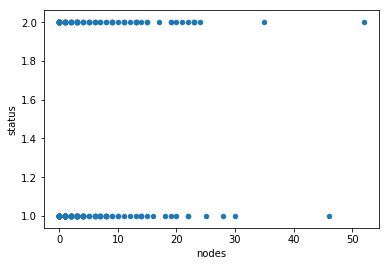

In [12]:
# Let's try out a simple plot

haberman.plot(kind="scatter", x = "nodes", y="status")

**Observations**:
* Although status values are discrete, they seem to have a big overlap of nodes
* that makes the pair a bad choice for analysis

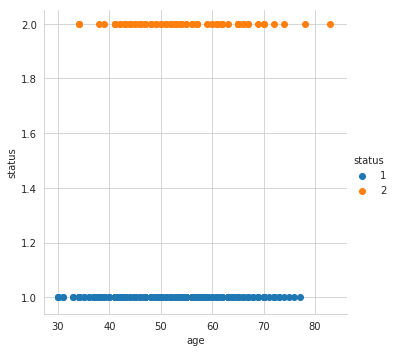

In [13]:
# Using seaborn to plot prettier plots

sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(plt.scatter, "age", "status") \
   .add_legend()

**Observations**:
* This didn't give very useful insight, as the status doesn't look properly distributed based on auxiliary nodes

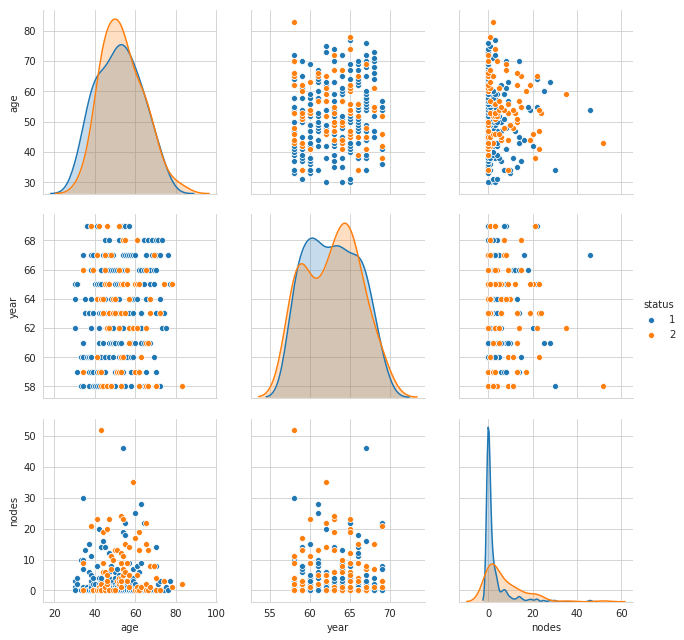

In [28]:
# Let's try pair plots to get a better idea about the data
sns.pairplot(haberman, hue="status", vars=["age", "year", "nodes"], height=3)

**Observations**:
* By looking at above plots, we can say that year & age / nodes & year / age and nodes are definitely not good choices for analysis
* However if the properties would be separated enough, pair plots would give much more information about our dataset

## Histogram

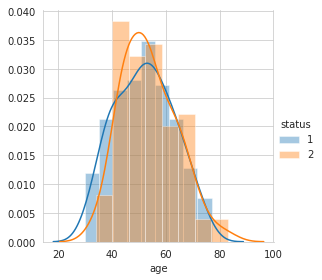

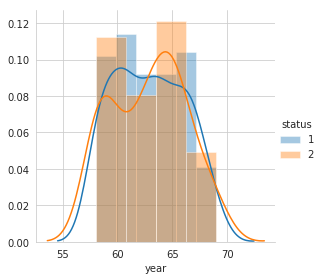

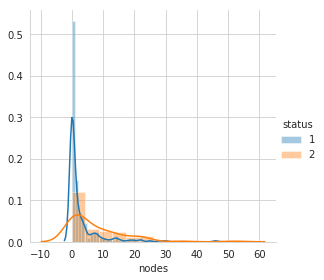

In [17]:
# After doing univariate analysis, we should be able to get a better \
# understanding of the data

for attribute in haberman.columns[:-1]:
    sns.FacetGrid(haberman, hue="status", height=4) \
       .map(sns.distplot, attribute) \
       .add_legend()

**Observations**:
* Patients are more likely to die in the age range 40-50 
* Most of the patients died in 1965


# PDF & CDF Plot

age PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
 bin_edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]

age CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


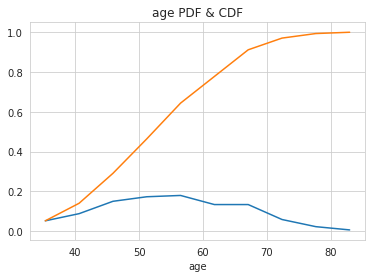

In [30]:
def plot_pdf_cdf(dataframe, parameter):
    counts, bin_edges = np.histogram(dataframe[parameter], bins=10, density=True)

    pdf = counts / sum(counts)
    print("{} PDF: {}\n bin_edges: {}\n".format(parameter, pdf, bin_edges))

    cdf = np.cumsum(pdf)
    print("{} CDF: {}".format(parameter, cdf))

    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)

    plt.xlabel(parameter)
    plt.title("{} PDF & CDF".format(parameter))

plot_pdf_cdf(haberman, "age")

# Observations:

**Observations**:

* Looking at the CDF, we can say that more than ~86% of patients who had undergone the surgery were older than 40 years. Based on this, we can say that breast cancer usually hits in late 40s

nodes PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
 bin_edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

nodes CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


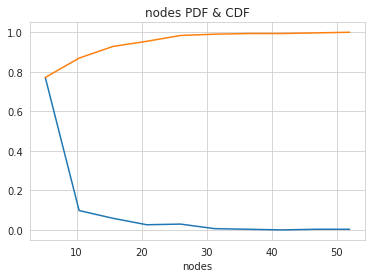

In [31]:
plot_pdf_cdf(haberman, "nodes")

**Observations**:
* ~78% of the patients had auxiliary nods less than or equal to 4

year PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
 bin_edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

year CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


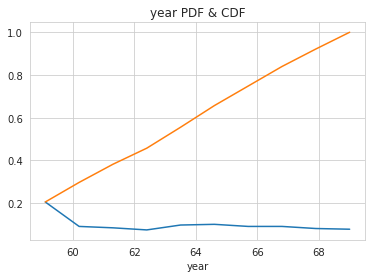

In [33]:
plot_pdf_cdf(haberman, "year")

**Observations**:
* Most of the cases were observed in between 60-70

status PDF: [0.73529412 0.         0.         0.         0.         0.
 0.         0.         0.         0.26470588]
 bin_edges: [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]

status CDF: [0.73529412 0.73529412 0.73529412 0.73529412 0.73529412 0.73529412
 0.73529412 0.73529412 0.73529412 1.        ]


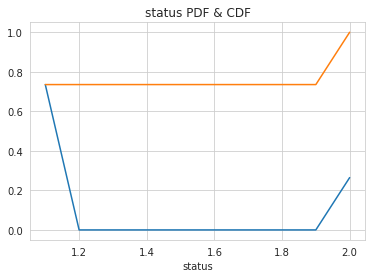

In [34]:
plot_pdf_cdf(haberman, "status")

**Observations**:
* After looking at above plot, we can say that most of the surgeries were not successful

# Box Plot

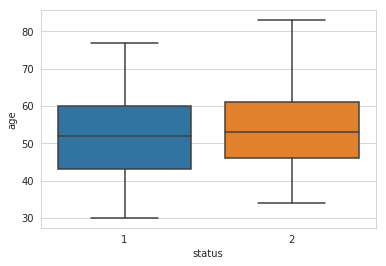

In [35]:
sns.boxplot(x="status", y="age", data=haberman) 

**Observations**:
* The people who were in age 30-34 survived the surgery
* The people having age more than ~77 unfortunately could not survive after the surgery
* High risk of surgery was in the age range 46-62

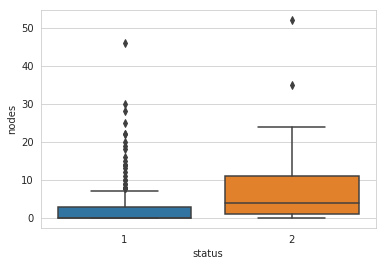

In [70]:
sns.boxplot(x="status", y="nodes", data=haberman) 

**Observations**:

* Although this plot is difficult to read, it explains one thing very clearly.. 
* The higher the number of the nodes is, higher risk is there


* Above 2 boxplots are useful in this classification.
* So overall we can say that, for our analysis, age & nodes are the most important features

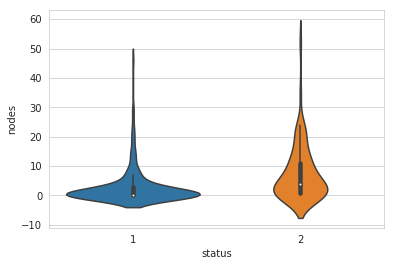

In [37]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8) 

**Observations**:
* Just like the above plots, this plot shows that lesser the nodes are there, less risk is present

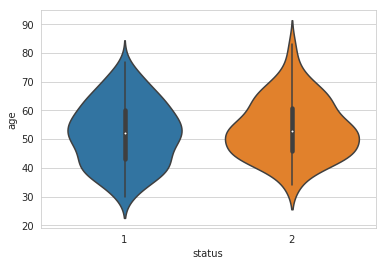

In [43]:
sns.violinplot(x="status", y="age", data=haberman, size=8)

**Observations**:
* Mid aged people possess higher risk of death after surgery

## Conclusion:
* People aged 30-34 tend to live longer than mid aged people after the surgery
* If there's a high number of auxiliary nodes, there'll be much higher risk of death after the surgery
* More than ~86% of patients who had undergone the surgery were older than 40 years. So the highest risk of breast cancer is at the age of 40 and above.
* According to statistics, people having age more than 77 years are likely to die in 5 years after the surgery